<a href="https://colab.research.google.com/github/deepakvitap8255/thesparksfoundationtasks/blob/main/Linear_Regression_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import torch
torch.manual_seed(1)
import matplotlib.pyplot as plt  
%matplotlib inline

## **Linear Regression with Python's PyTorch Framework**
In this section we will see how the Python PyTorch framework for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

#printing top 5 rows of csv 
data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

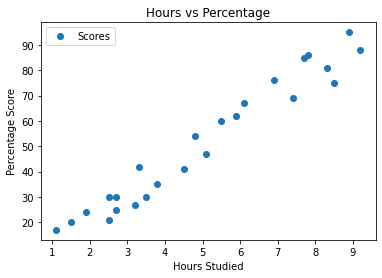

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = data[data.columns[:-1]]  
y = data[data.columns[-1]]

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
train_x=torch.from_numpy(X_train.to_numpy()).float()
train_y=torch.from_numpy(y_train.to_numpy()).float()
test_x=torch.from_numpy(X_test.to_numpy()).float()
test_y=torch.from_numpy(y_test.to_numpy()).float()

### **Defining model and loss function**


> Model: $\hat{Y}$$ _{(m,1)}$ = X$ _{(m,n)}$W$^T$$ _{(n,1)}$ +B $ _{(m,1)}$

> Mean Absolute Loss: L= $\sum_{i=1}^{m}$	| y_pred$ _{i}$ - y$ _{i}$ |




In [ ]:
def model(input,W,B):
    return torch.add(torch.matmul(input,W.T),B)
def loss_fn(y_hat,y):
    return torch.div(torch.sum(torch.abs(torch.sub(y_hat,y))),len(y))

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
train_losses=[]
test_losses=[]
def train_eval(epochs,lr=1e-02):
    global W
    global B
    W=torch.randn(1,1,requires_grad=True)
    B=torch.randn(1,1,requires_grad=True)
    prev_loss={"train":np.Inf,"test":np.Inf}
    for i in range(epochs):
        Y_hat= model(train_x,W,B)
        loss=loss_fn(Y_hat,train_y.view(-1,1))
        loss.backward()
        train_loss=loss.item()
        with torch.no_grad():
            W-=lr*W.grad
            B-=lr*B.grad
            W.grad.data.zero_()
            B.grad.data.zero_()
        y_hat= model(test_x,W,B)
        loss=loss_fn(y_hat,test_y.view(-1,1))
        test_loss=loss.item()
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        if((i%10==0)):
            print(f"Epoch: {i}\nTrain Loss: {train_loss}\nTest Loss: {test_loss}")
train_eval(181)

Epoch: 0
Train Loss: 50.217594146728516
Test Loss: 38.396690368652344
Epoch: 10
Train Loss: 47.371826171875
Test Loss: 36.148292541503906
Epoch: 20
Train Loss: 44.52607727050781
Test Loss: 33.89989471435547
Epoch: 30
Train Loss: 41.68031311035156
Test Loss: 31.6514892578125
Epoch: 40
Train Loss: 38.83454132080078
Test Loss: 29.403085708618164
Epoch: 50
Train Loss: 35.98877716064453
Test Loss: 27.154682159423828
Epoch: 60
Train Loss: 33.143009185791016
Test Loss: 24.90627670288086
Epoch: 70
Train Loss: 30.297250747680664
Test Loss: 22.657873153686523
Epoch: 80
Train Loss: 27.45148277282715
Test Loss: 20.409469604492188
Epoch: 90
Train Loss: 24.605714797973633
Test Loss: 18.16106414794922
Epoch: 100
Train Loss: 21.759952545166016
Test Loss: 15.91265869140625
Epoch: 110
Train Loss: 18.914186477661133
Test Loss: 13.664255142211914
Epoch: 120
Train Loss: 16.068418502807617
Test Loss: 11.415850639343262
Epoch: 130
Train Loss: 13.22265338897705
Test Loss: 9.16744613647461
Epoch: 140
Train Los

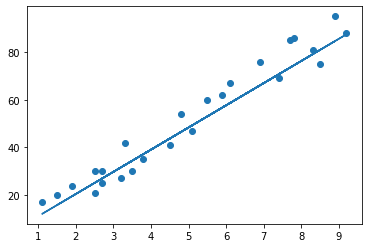

In [ ]:
# Plotting the regression line
line = W.detach().view(-1).numpy()*X+B.detach().view(-1).numpy()

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = model(test_x,W,B) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.detach().view(-1).numpy()})  
df 

,Actual,Predicted
5,20,15.817822
2,27,31.623178
19,69,70.671700
16,30,25.115091
11,62,56.725796


In [ ]:
# You can also test with your own data
hours = torch.tensor([[9.25]])
own_pred = model(hours,W,B)
print("No of Hours = {}".format(hours.view(-1).detach().numpy()))
print("Predicted Score = {}".format(own_pred[0].detach().view(-1).numpy()))

No of Hours = [9.25]
Predicted Score = [87.87164]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error and r square metric. There are many such metrics.

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(test_y.numpy(), y_pred.detach().view(-1).numpy()))

Mean Absolute Error: 4.127234


####**Plotting Loss over time**
Plotting losses of train and test losses over epochs

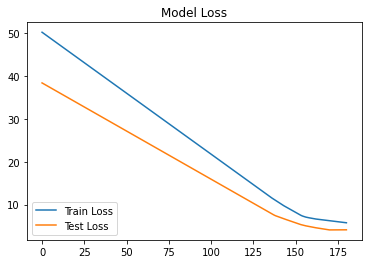

In [ ]:
plt.plot(train_losses,label="Train Loss")
plt.plot(test_losses,label="Test Loss")
plt.title("Model Loss")
plt.legend(loc=3)
plt.show()